#Import Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/dataset_files/sales_training_data.xlsx")
df

,Date,Product,Units,Price
0,2025-01-01,Laptop,2,50000
1,2025-01-02,Mobile,3,20000
2,2025-01-03,Tablet,4,15000
3,2025-01-04,Laptop,1,50000
4,2025-01-05,Mobile,5,20000
5,2025-01-06,Tablet,2,15000
6,2025-01-07,Laptop,3,50000
7,2025-01-08,Mobile,2,20000
8,2025-01-09,Tablet,1,15000
9,2025-01-10,Laptop,4,50000


1) needs the revenue product wise
2) needs the sales graph day wise
3) needs the observations(unique product pie chart sales)



#Technically
1) import the excel file
2) check for the null values or duplicate values
3) calculate the revenue using numpy
4) add revenue column(unit*price) in df
5) generate plots (bar, line, pie) for sales data with using to_datetime
6) generate graph for units sold category wise
7) generate sub plots for every week.(product wise revenue)

In [9]:
df.isnull().sum()


,0
Date,0
Product,0
Units,0
Price,0


#check for null and duplicate values

In [10]:
df.isnull().sum()

,0
Date,0
Product,0
Units,0
Price,0


In [11]:
df.duplicated().sum()

np.int64(0)

#calculate the revenue using numpy

In [12]:
Revenue_np = np.array(df["Units"]*df["Price"])
df["Revenue"] = Revenue_np
df

,Date,Product,Units,Price,Revenue
0,2025-01-01,Laptop,2,50000,100000
1,2025-01-02,Mobile,3,20000,60000
2,2025-01-03,Tablet,4,15000,60000
3,2025-01-04,Laptop,1,50000,50000
4,2025-01-05,Mobile,5,20000,100000
5,2025-01-06,Tablet,2,15000,30000
6,2025-01-07,Laptop,3,50000,150000
7,2025-01-08,Mobile,2,20000,40000
8,2025-01-09,Tablet,1,15000,15000
9,2025-01-10,Laptop,4,50000,200000


## Calculate Revenue Product-wise


In [14]:
product_revenue = df.groupby('Product')['Revenue'].sum()
print(product_revenue)

Product
Laptop    1350000
Mobile     600000
Tablet     450000
Name: Revenue, dtype: int64


## Generate Daily Sales Graph


In [15]:
print(df['Date'].dtype)
df['Date'] = pd.to_datetime(df['Date'])


object


#Bar Graph

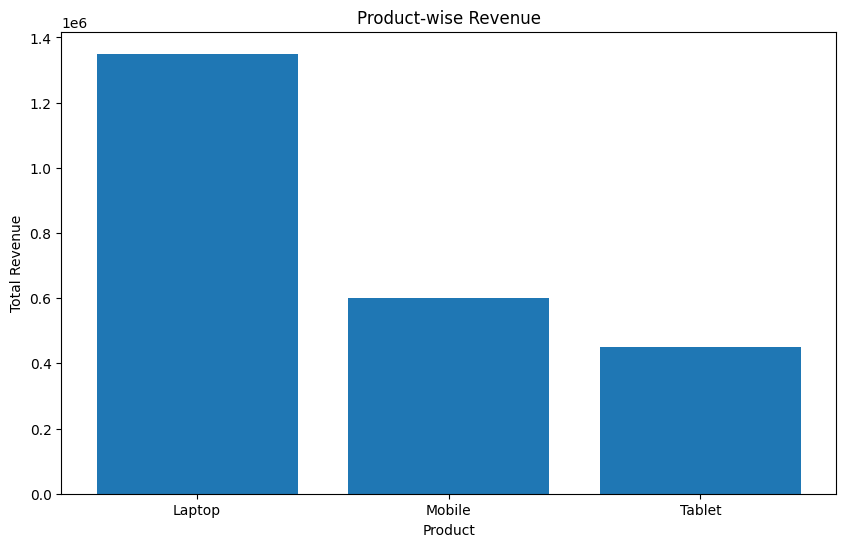

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(product_revenue.index, product_revenue.values)
plt.title('Product-wise Revenue')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.show()

#Line Graph

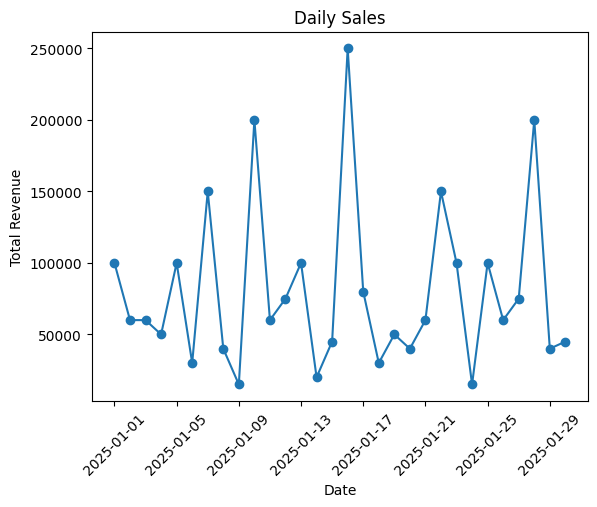

In [17]:
daily_sales = df.groupby('Date')['Revenue'].sum()
plt.plot(daily_sales.index, daily_sales.values, marker='o')
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

#Product Sales Pie Chart


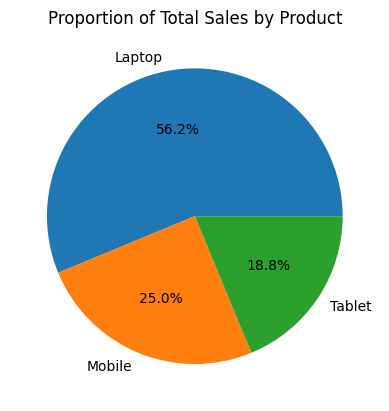

In [18]:
plt.pie(product_revenue.values, labels=product_revenue.index, autopct='%1.1f%%')
plt.title('Proportion of Total Sales by Product')
plt.show()

1) generate graph for units sold category wise
2) generate sub plots for every week.(product wise revenue)

# Generate graph for units sold category wise

In [19]:
product_units = df.groupby('Product')['Units'].sum()
print(product_units)

Product
Laptop    27
Mobile    30
Tablet    30
Name: Units, dtype: int64


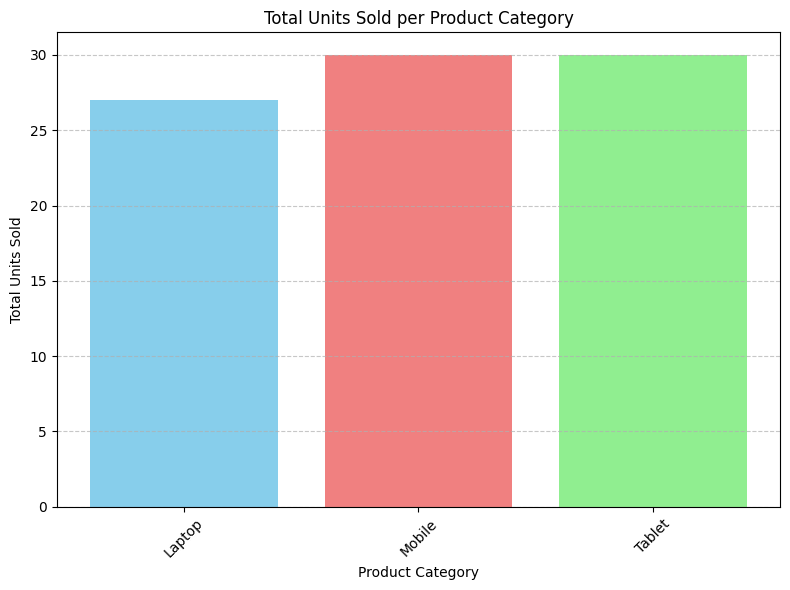

In [20]:
plt.figure(figsize=(8, 6))
plt.bar(product_units.index, product_units.values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Total Units Sold per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Product-wise Revenue Subplots (Weekly)

In [25]:
df['Week'] = df['Date'].dt.isocalendar().week
print(df.head(12))

         Date Product  Units  Price  Revenue  Week
0  2025-01-01  Laptop      2  50000   100000     1
1  2025-01-02  Mobile      3  20000    60000     1
2  2025-01-03  Tablet      4  15000    60000     1
3  2025-01-04  Laptop      1  50000    50000     1
4  2025-01-05  Mobile      5  20000   100000     1
5  2025-01-06  Tablet      2  15000    30000     2
6  2025-01-07  Laptop      3  50000   150000     2
7  2025-01-08  Mobile      2  20000    40000     2
8  2025-01-09  Tablet      1  15000    15000     2
9  2025-01-10  Laptop      4  50000   200000     2
10 2025-01-11  Mobile      3  20000    60000     2
11 2025-01-12  Tablet      5  15000    75000     2


In [22]:
weekly_product_revenue = df.groupby(['Week', 'Product'])['Revenue'].sum().unstack()
print(weekly_product_revenue.head())

Product  Laptop  Mobile  Tablet
Week                           
1        150000  160000   60000
2        350000  100000  120000
3        400000  100000   75000
4        250000  200000   75000
5        200000   40000  120000


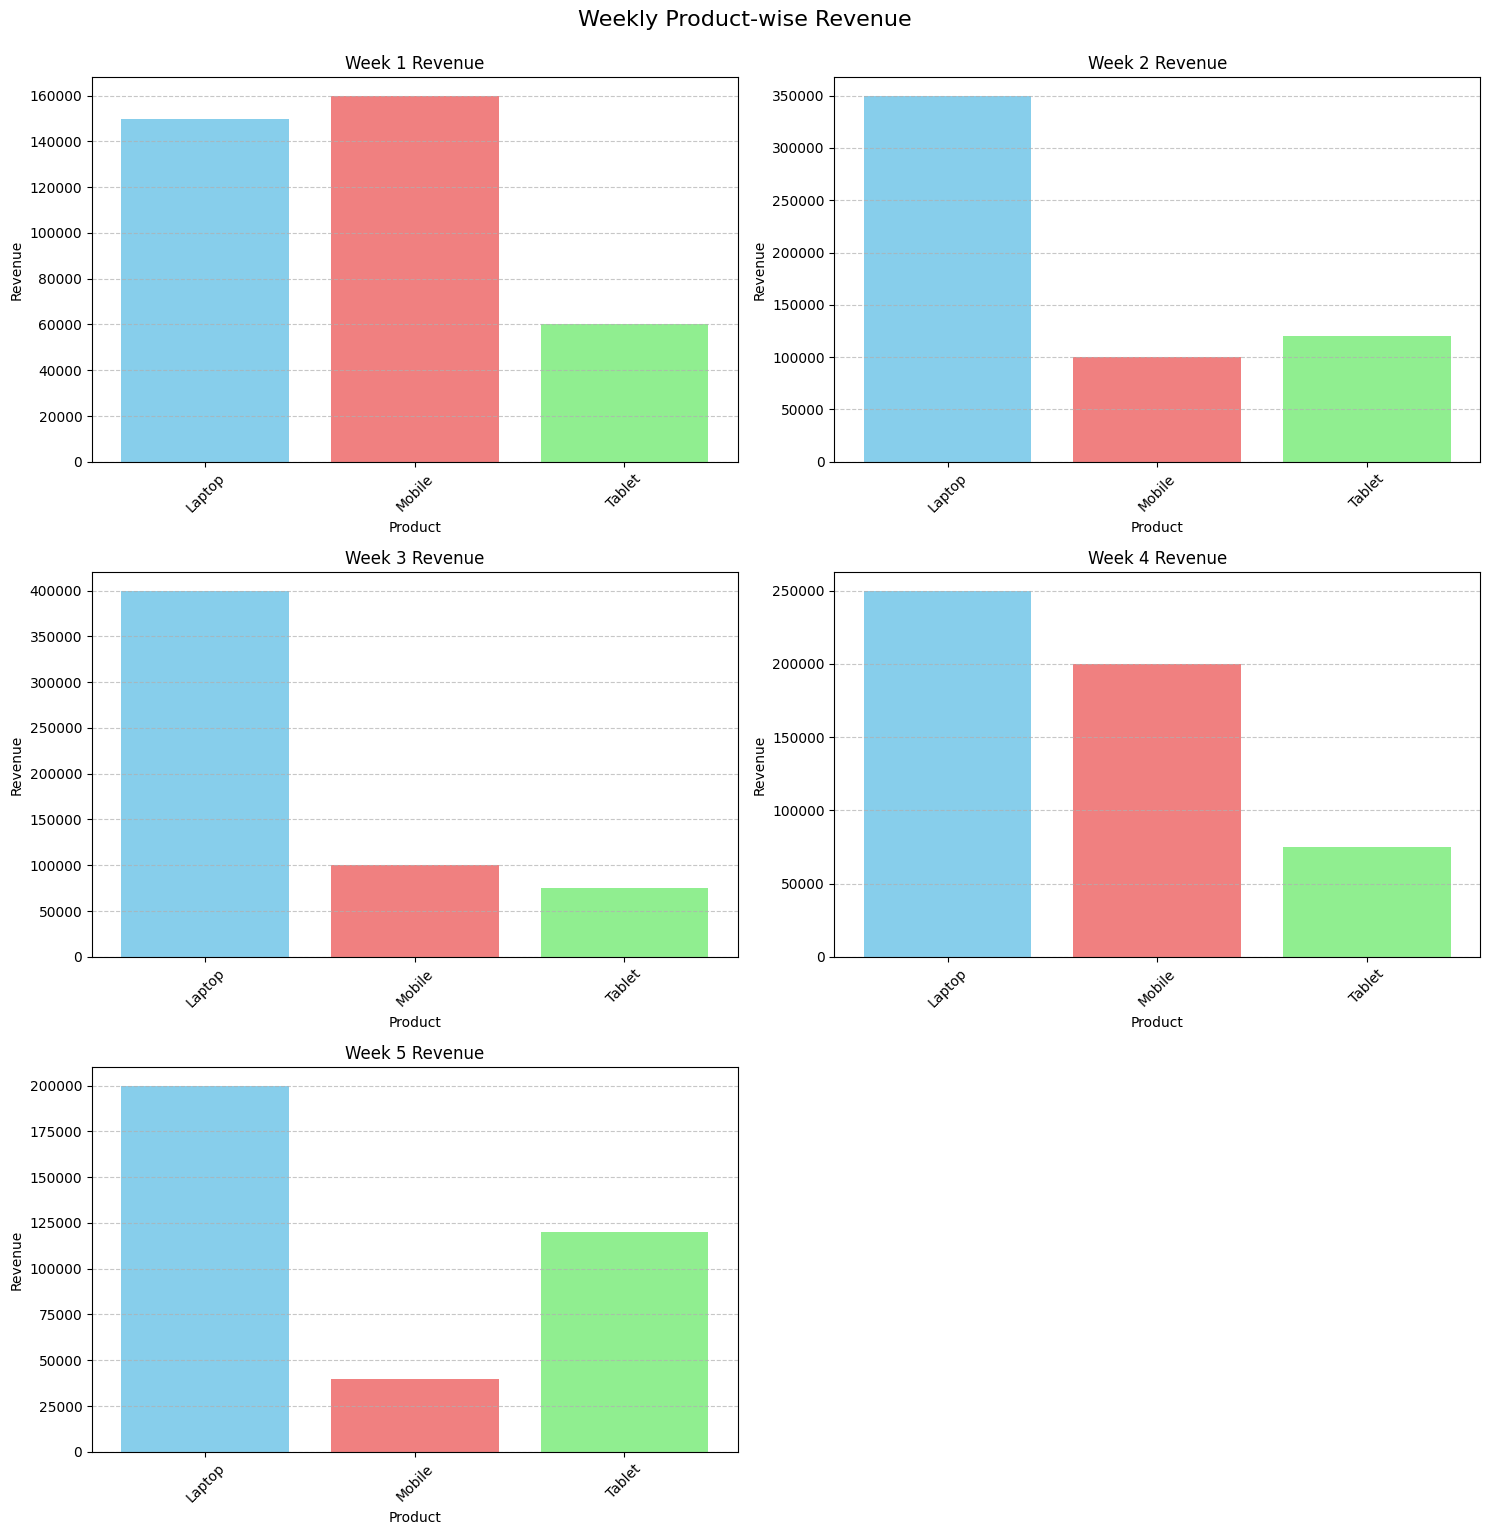

In [23]:
num_weeks = len(weekly_product_revenue)
num_cols = 2
num_rows = (num_weeks + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, (week, data) in enumerate(weekly_product_revenue.iterrows()):
    axes[i].bar(data.index, data.values, color=['skyblue', 'lightcoral', 'lightgreen'])
    axes[i].set_title(f'Week {week} Revenue')
    axes[i].set_xlabel('Product')
    axes[i].set_ylabel('Revenue')
    axes[i].ticklabel_format(style='plain', axis='y') # Prevent scientific notation
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Weekly Product-wise Revenue', y=1.02, fontsize=16)
plt.show()